<a href="https://colab.research.google.com/github/robgon-art/digital-art-showdown/blob/main/Prompt_Similarity_vs_Esthetic_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-dm__sbyh
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-dm__sbyh
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369409 sha256=c94fa4619cd086c1626a806a9e9c84a4e5e1bebc0c84c9c0facc257a5a9a5c99
  Stored in directory: /tmp/pip-ephem-wheel-cache-_0frxf2r/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [ ]:
import clip
print(clip.available_models())

['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14', 'ViT-L/14@336px']


In [ ]:
import torch
import clip
from PIL import Image
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)

100%|███████████████████████████████████████| 891M/891M [00:29<00:00, 31.8MiB/s]


In [ ]:
import glob
file_list = glob.glob("/content/drive/MyDrive/stable_diffusion/*/*/*.png")
file_list.sort()

In [ ]:
print(file_list[96:96+12])

['/content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/2759034346_charcoal_drawing_of_a_young_Brazilian_woman.png', '/content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/3447951393_charcoal_drawing_of_a_young_Brazilian_woman.png', '/content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/3865261325_charcoal_drawing_of_a_young_Brazilian_woman.png', '/content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/3983636955_charcoal_drawing_of_a_young_Brazilian_woman.png', '/content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/DALL·E 2022-10-29 23.21.10 - charcoal drawing of a young Brazilian woman.png', '/content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/DALL·E 2022-10-29 23.21.24 - charcoal drawing of a young Brazilian girl.png', '/content/drive/MyDrive/stable_dif

In [ ]:
from PIL import ImageFont, ImageDraw
fnt = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', 40)
dimensions = {"Abstract":(512, 512), "Landscape":(640, 512), "Portrait":(512, 640),
         "Still Life":(640, 512)}

for i, f in enumerate(file_list):
  if "DALL·E" in f:
    sd = "DE"
  elif "robgon-art" in f:
    sd = "MJ"
  else:
    sd = "SD"
  c = i%4

  print(f)
  parts = f.split("/")
  subject = parts[5]
  prompt = parts[6]
  dims = dimensions[subject]
  img = Image.open(f)
  img_resized = img.resize(dims)
  draw = ImageDraw.Draw(img_resized)

  if sd == "DE":
    draw.text((3, dims[1]-41), sd+str(c), font=fnt, fill=(255, 127, 14, 255))
  elif sd == "MJ":
    draw.text((3, dims[1]-41), sd+str(c), font=fnt, fill=(31, 119, 180, 255))
  else:
    draw.text((3, dims[1]-41), sd+str(c), font=fnt, fill=(44, 160, 44, 255))

  draw.text((6, dims[1]-44), sd+str(c), font=fnt, fill=(255, 255, 255, 255))

  if c == 0:
    w = dims[0]*2+10
    h = dims[1]*2+10
    im = Image.new(mode = "RGB", size = (w, h), color = (255, 255, 255))
    Image.Image.paste(im, img_resized, (0, 0))

  elif c == 1:
    Image.Image.paste(im, img_resized, (dims[0]+10, 0))
  elif c == 2:
    Image.Image.paste(im, img_resized, (0, dims[1]+10))
  else:
    Image.Image.paste(im, img_resized, (dims[0]+10, dims[1]+10))
    im.save("/content/drive/MyDrive/stable_diffusion/charts/"+subject+"/"+prompt+"_"+sd+".jpg", quality=95)

/content/drive/MyDrive/stable_diffusion/Abstract/abstract painting of triangles in orange/1003477924_abstract_painting_of_triangles_in_orange.png
/content/drive/MyDrive/stable_diffusion/Abstract/abstract painting of triangles in orange/1503650147_abstract_painting_of_triangles_in_orange.png
/content/drive/MyDrive/stable_diffusion/Abstract/abstract painting of triangles in orange/2822214846_abstract_painting_of_triangles_in_orange.png
/content/drive/MyDrive/stable_diffusion/Abstract/abstract painting of triangles in orange/718966705_abstract_painting_of_triangles_in_orange.png
/content/drive/MyDrive/stable_diffusion/Abstract/abstract painting of triangles in orange/DALL·E 2022-10-16 16.18.04 - abstract painting of triangles in orange.png
/content/drive/MyDrive/stable_diffusion/Abstract/abstract painting of triangles in orange/DALL·E 2022-10-16 16.18.11 - abstract painting of triangles in orange.png
/content/drive/MyDrive/stable_diffusion/Abstract/abstract painting of triangles in orange

 0.3184 -0.0072 /content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/2759034346_charcoal_drawing_of_a_young_Brazilian_woman.png
 0.3071  0.0076 /content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/3447951393_charcoal_drawing_of_a_young_Brazilian_woman.png
 0.2827 -0.0039 /content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/3865261325_charcoal_drawing_of_a_young_Brazilian_woman.png
 0.2988  0.0050 /content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/3983636955_charcoal_drawing_of_a_young_Brazilian_woman.png
 0.2949 -0.0038 /content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/DALL·E 2022-10-29 23.21.10 - charcoal drawing of a young Brazilian woman.png
 0.2573  0.0039 /content/drive/MyDrive/stable_diffusion/Portrait/charcoal drawing of a young Brazilian woman/DALL·E 2022-10-29 23.21.24 - char

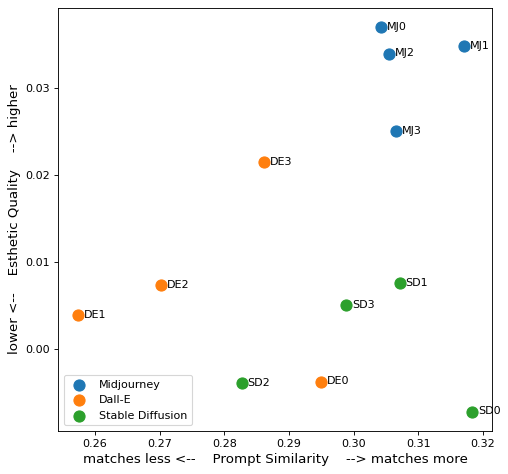

In [ ]:
from IPython.display import display
prompt_similarities = []
esthetic_qualities = []
embeddings = []
labels = []

start = 96

for i, f in enumerate(file_list[start:start+12]):
  if "DALL·E" in f:
    sd = "DE"
  elif "robgon-art" in f:
    sd = "MJ"
  else:
    sd = "SD"
  c = i%4
  labels.append(sd+str(c))
  parts = f.split("/")
  subject = parts[5]
  prompt = parts[6]
  # print(sd, c, subject, prompt, f)

  img = Image.open(f)
  img_resized = img.resize((336, 336))
  # display(img_resized)

  image = preprocess(img_resized).unsqueeze(0).to(device)
  text = clip.tokenize(["fake art", "real art", "bad art", "good art", 
    prompt]).to(device)

  with torch.no_grad():
    image_features = model.encode_image(image)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    embeddings.append(image_features.flatten().cpu().tolist())
    text_features = model.encode_text(text)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

  fake = similarity[0][0]
  real = similarity[1][0]
  bad = similarity[2][0]
  good = similarity[3][0]
  esthetic_quality = (real-fake) + (good-bad)

  prompt_similarity = similarity[4][0]

  prompt_similarities.append(esthetic_quality)
  esthetic_qualities.append(prompt_similarity)

  print("{:7.4f}".format(prompt_similarity), "{:7.4f}".format(esthetic_quality), f)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 7), dpi=80)

plt.xlabel("matches less <--    Prompt Similarity    --> matches more", fontsize=12)
plt.ylabel("lower <--    Esthetic Quality    --> higher", fontsize=12)
plt.scatter(esthetic_qualities[8:12], prompt_similarities[8:12], s=100, label="Midjourney")
plt.scatter(esthetic_qualities[4:8], prompt_similarities[4:8], s=100, label="Dall-E")
plt.scatter(esthetic_qualities[0:4], prompt_similarities[0:4], s=100, label="Stable Diffusion")
plt.legend(loc="lower left")

for i, txt in enumerate(labels):
  ax.annotate(txt, (esthetic_qualities[i]+0.0009, prompt_similarities[i]-0.0003))
plt.show()